<a href="https://colab.research.google.com/github/the77hnx/works-in-the-univ/blob/main/ML_for_IOT_Tp02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Download the dataset using wget
!wget http://db.csail.mit.edu/labdata/data.txt.gz

# Unzip the downloaded dataset
!gunzip data.txt.gz

--2024-10-27 19:17:21--  http://db.csail.mit.edu/labdata/data.txt.gz
Resolving db.csail.mit.edu (db.csail.mit.edu)... 128.52.128.91
Connecting to db.csail.mit.edu (db.csail.mit.edu)|128.52.128.91|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://db.csail.mit.edu/labdata/data.txt.gz [following]
--2024-10-27 19:17:21--  https://db.csail.mit.edu/labdata/data.txt.gz
Connecting to db.csail.mit.edu (db.csail.mit.edu)|128.52.128.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34422518 (33M) [application/x-gzip]
Saving to: ‘data.txt.gz’

data.txt.gz         100%[===================>]  32.83M   136MB/s    in 0.2s    

2024-10-27 19:17:21 (136 MB/s) - ‘data.txt.gz’ saved [34422518/34422518]

gzip: data.txt already exists; do you wish to overwrite (y or n)? y


In [17]:
import pandas as pd

# Load the dataset
dataset_path = 'data.txt'
# The dataset has space-separated values with columns: date, time, epoch, moteid, temperature, humidity, light, voltage
column_names = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']
df = pd.read_csv(dataset_path, sep='\\s+', header=None, names=column_names)


In [18]:
# Combine the 'date' and 'time' columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce', format='mixed')

# Drop rows where the datetime conversion failed (if any)
df.dropna(subset=['datetime'], inplace=True)

# Drop the original 'date' and 'time' columns
df.drop(['date', 'time'], axis=1, inplace=True)

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

# Display the first few rows
df.head()


,epoch,moteid,temperature,humidity,light,voltage
datetime,,,,,,
2004-03-31 03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
2004-02-28 00:59:16.027850,3,1.0,19.9884,37.09330,45.08,2.69964
2004-02-28 01:03:16.333930,11,1.0,19.3024,38.46290,45.08,2.68742
2004-02-28 01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
2004-02-28 01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [19]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Optionally, remove outliers using thresholds for temperature, humidity, etc.
df = df[(df['temperature'] > -40) & (df['temperature'] < 100)]  # Example temperature range

Missing values:
 epoch              0
moteid           526
temperature      526
humidity         899
light            903
voltage        93879
dtype: int64


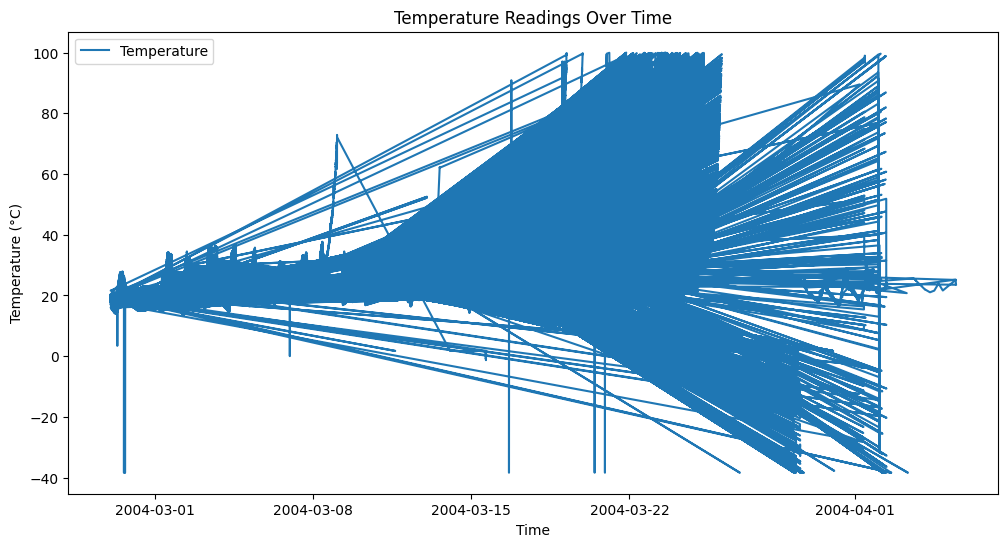

In [20]:
import matplotlib.pyplot as plt

# Plot temperature readings over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature'], label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Readings Over Time')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Sort the dataset by the datetime index
df = df.sort_index()

# Define the ratios for splitting the data
train_size = 0.7
val_size = 0.15

# Split the data into training and remaining sets (validation + test)
train_data, temp_data = train_test_split(df, train_size=train_size, shuffle=False)

# Split the remaining data into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Display the sizes of each dataset
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 1295919
Validation set size: 277697
Test set size: 277698


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler only on the training data and transform the training set
train_data_scaled = scaler.fit_transform(train_data)

# Transform the validation and test sets using the fitted scaler
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

# Convert the scaled data back to DataFrames for easier manipulation
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns, index=train_data.index)
val_data_scaled = pd.DataFrame(val_data_scaled, columns=val_data.columns, index=val_data.index)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns, index=test_data.index)

# Display the first few rows of the normalized training data
train_data_scaled.head()


,epoch,moteid,temperature,humidity,light,voltage
datetime,,,,,,
2004-02-28 00:58:46.002832,0.0,0.333333,0.522275,0.991449,0.038845,0.853711
2004-02-28 00:58:46.171824,0.0,0.444444,0.521219,0.991501,0.052789,0.853711
2004-02-28 00:58:46.206631,0.0,0.425926,0.522627,0.991456,0.077689,0.857633
2004-02-28 00:58:46.497331,0.0,0.037037,0.526501,0.991426,0.027390,0.853711
2004-02-28 00:58:46.657464,0.0,0.092593,0.528438,0.991396,0.065737,0.838363


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape the data to add a 'time step' dimension for 1D CNN
def reshape_data(data):
    return np.expand_dims(data.values, axis=2)

# Reshape the training, validation, and test sets
X_train = reshape_data(train_data_scaled)
X_val = reshape_data(val_data_scaled)
X_test = reshape_data(test_data_scaled)

# The target variable could be any of the columns, e.g., predicting 'temperature'.
# Here, we assume 'temperature' is the target column.
y_train = train_data_scaled['temperature'].values
y_val = val_data_scaled['temperature'].values
y_test = test_data_scaled['temperature'].values

# Display the shapes of the reshaped data
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1295919, 6, 1)
Validation set shape: (277697, 6, 1)
Test set shape: (277698, 6, 1)


In [24]:
# 1. Design the 1D CNN model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=1),  # Change pooling size to 1
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=1),  # Change pooling size to 1
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Single output for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# 2. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - loss: 0.0011 - val_loss: 6.4905e-05
Epoch 2/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - loss: 5.9948e-05 - val_loss: 1.6592e-05
Epoch 3/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - loss: 5.4750e-05 - val_loss: 1.8198e-05
Epoch 4/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - loss: 5.0917e-05 - val_loss: 2.2391e-05
Epoch 5/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - loss: 5.1043e-05 - val_loss: 5.1246e-06
Epoch 6/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - loss: 5.0511e-05 - val_loss: 8.7673e-06
Epoch 7/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 4.9088e-05 - val_loss: 1.7633e-05
Epoch 8/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - loss: 4.8585e-05 - val_loss: 1.6662e-05
Epoch 9/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - loss: 4.8807e-05 - val_loss: 6.2581e-06
Epoch 10/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - loss: 4.8639e-05 - val_loss: 1.1292e-05
Epoch 11

In [27]:
# 3. Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

Test Loss: 0.0002250613906653598


In [37]:
model_cnn = model

In [47]:
cnn_history = history

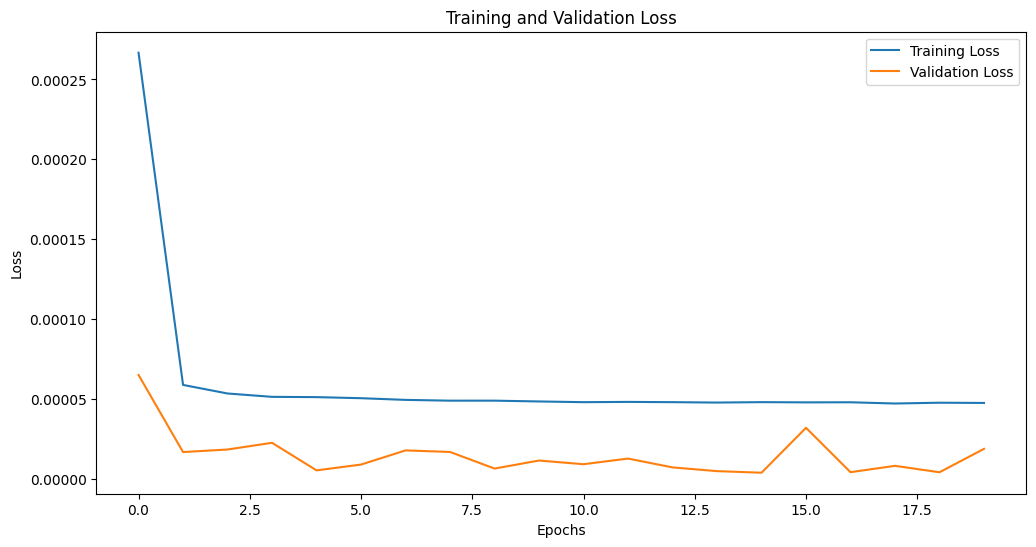

In [28]:
#4.  Plot training and validation loss for each epoch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
# Reshape the data for RNN input (already done previously for the CNN)
# X_train, X_val, and X_test are reshaped to (samples, timesteps, features)

In [30]:
# Choose between LSTM or GRU (using LSTM here as an example)
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dense(1)  # Single output for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 277s 7ms/step - loss: 4.4788e-04 - val_loss: 1.5453e-04
Epoch 2/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 313s 7ms/step - loss: 1.7114e-05 - val_loss: 1.6882e-04
Epoch 3/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 318s 7ms/step - loss: 1.0797e-05 - val_loss: 3.2156e-04
Epoch 4/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 326s 7ms/step - loss: 8.7631e-06 - val_loss: 2.2427e-04
Epoch 5/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 323s 7ms/step - loss: 6.2922e-06 - val_loss: 3.5753e-04
Epoch 6/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 268s 7ms/step - loss: 5.6722e-06 - val_loss: 2.6098e-04
Epoch 7/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 325s 7ms/step - loss: 4.8698e-06 - val_loss: 3.0206e-04
Epoch 8/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 270s 7ms/step - loss: 5.0906e-06 - val_loss: 3.1602e-04
Epoch 9/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 319s 7ms/step - loss: 4.0641e-06 - val_loss: 3.9337e-04
Epoch 10/20
40498/40498 ━━━━━━━━━━━━━━━━━━━━ 322s 7ms/step - loss: 3.7959e-06 - val_loss: 4.5165e-04

In [38]:
model_rnn = model

In [46]:
rnn_history = history

In [34]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

Test Loss: 0.002203223994001746


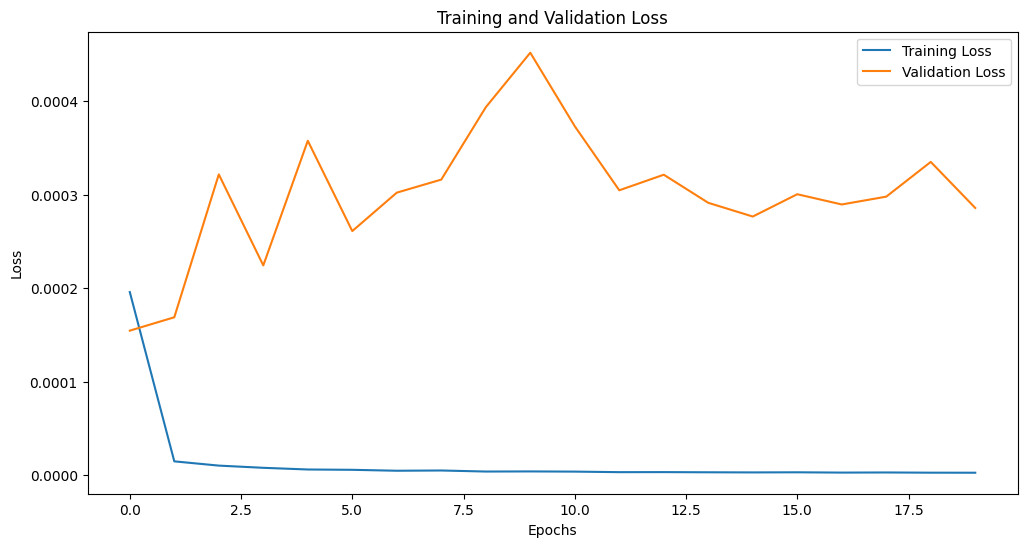

In [35]:
# Plot training and validation loss for each epoch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
cnn_predictions = model_cnn.predict(X_test)
rnn_predictions = model_rnn.predict(X_test)

# Calculate MSE and MAE for the CNN model
cnn_mse = mean_squared_error(y_test, cnn_predictions)
cnn_mae = mean_absolute_error(y_test, cnn_predictions)

# Calculate MSE and MAE for the RNN model
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)

# Print results
print(f"1D CNN - Test MSE: {cnn_mse:.4f}, Test MAE: {cnn_mae:.4f}")
print(f"RNN (LSTM/GRU) - Test MSE: {rnn_mse:.4f}, Test MAE: {rnn_mae:.4f}")


8679/8679 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
8679/8679 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
1D CNN - Test MSE: 0.0022, Test MAE: 0.0264
RNN (LSTM/GRU) - Test MSE: 0.0022, Test MAE: 0.0264


In [42]:
# CNN
#     Strengths :
#                - Feature Extraction: The convolutional layers can automatically extract features from the time series data.
#                  this makes them suitable for detecting short-term dependencies in sensor data.
#     Weaknesses :
#                - Limited Ability to Capture Long-Term Dependencies: While CNNs can detect local patterns.
#                  they may struggle with capturing long-term dependencies in sequential data compared to RNNs.
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
# RNN
#     Strengths :
#                - Handling Sequential Data: RNNs can learn from the entire sequence,
#                  enabling them to process data with temporal correlations more effectively than CNNs.
#     Weaknesses :
#                - Computational Complexity: RNNs are generally slower to train compared to CNNs due to their sequential nature,
#                  which requires more computation for each step.

In [43]:
# For temperature readings from IoT sensors, the choice of architecture depends on the characteristics of the data:

# Short-Term Prediction :
#                       If the task involves predicting short-term temperature changes, a 1D CNN might perform well due to its ability to capture local patterns efficiently.
# Long-Term Dependencies :
#                       If there are long-term trends or dependencies in the data (e.g., temperature cycles over days or weeks), an RNN (LSTM/GRU) would be more suitable.

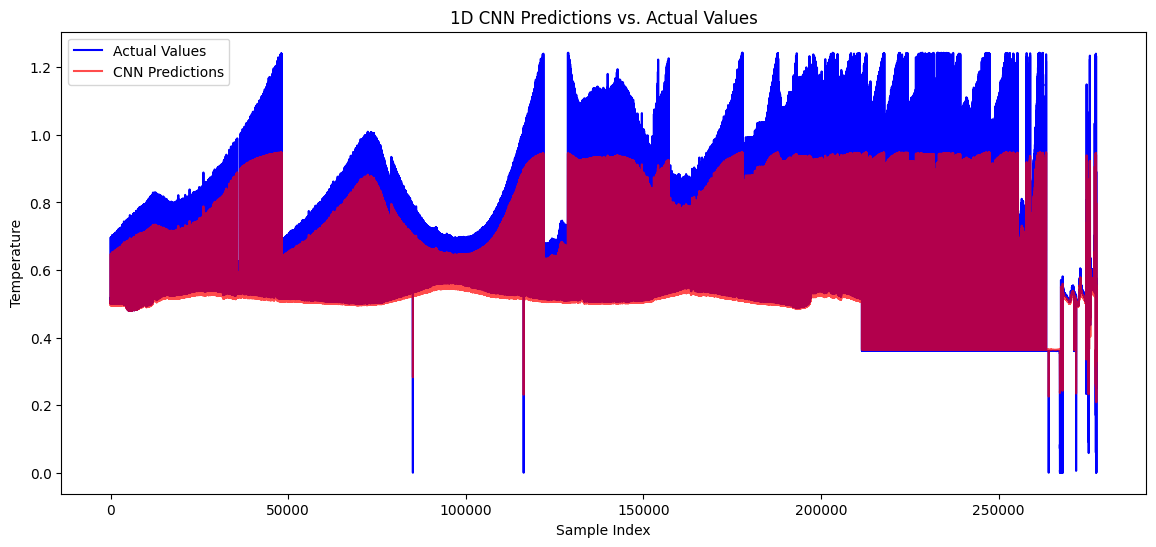

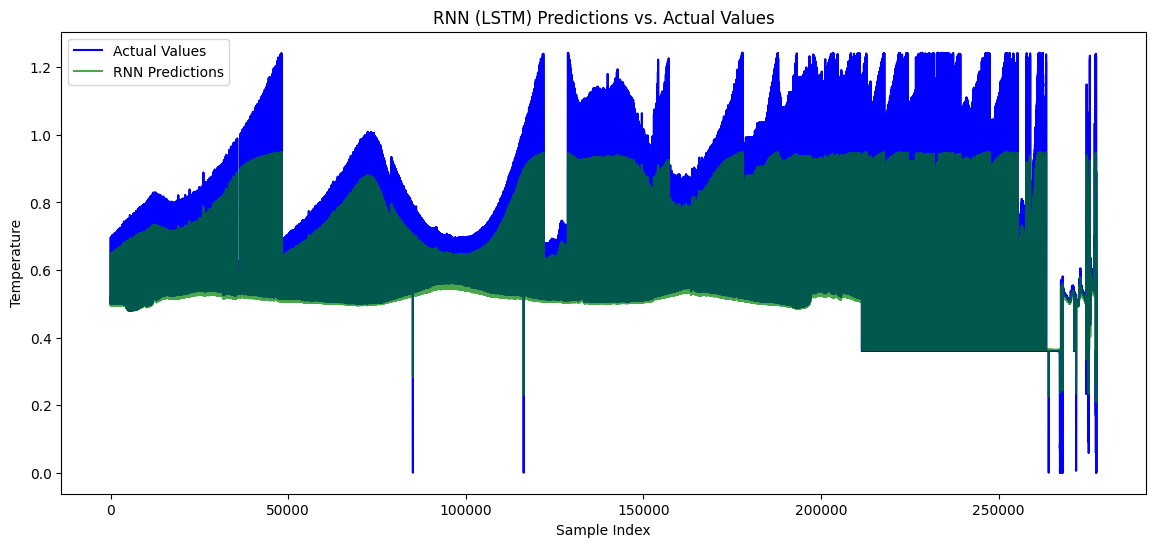

In [49]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for the CNN model
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values', color='b')
plt.plot(cnn_predictions, label='CNN Predictions', color='r', alpha=0.7)
plt.title('1D CNN Predictions vs. Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Plot actual vs. predicted values for the RNN model
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values', color='b')
plt.plot(rnn_predictions, label='RNN Predictions', color='g', alpha=0.7)
plt.title('RNN (LSTM) Predictions vs. Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()

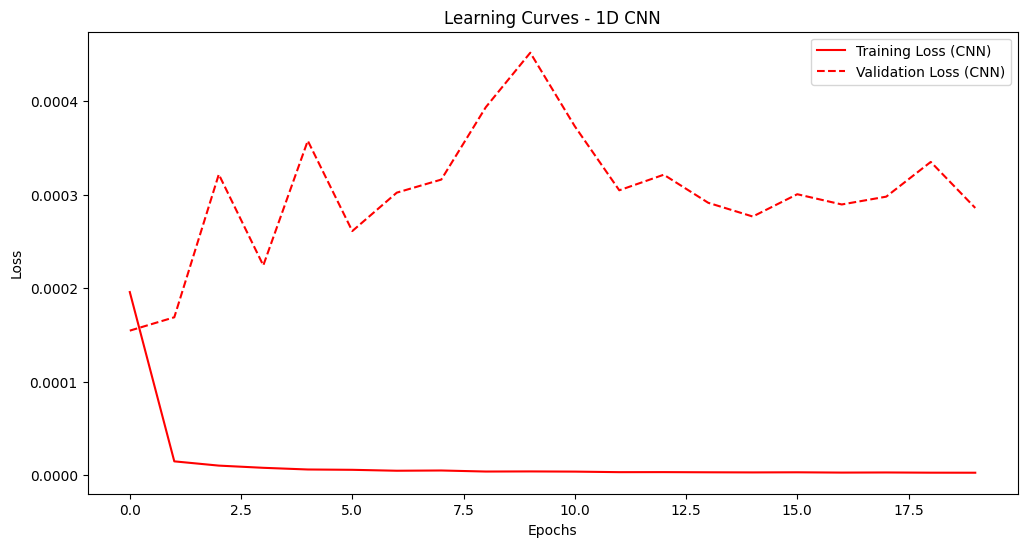

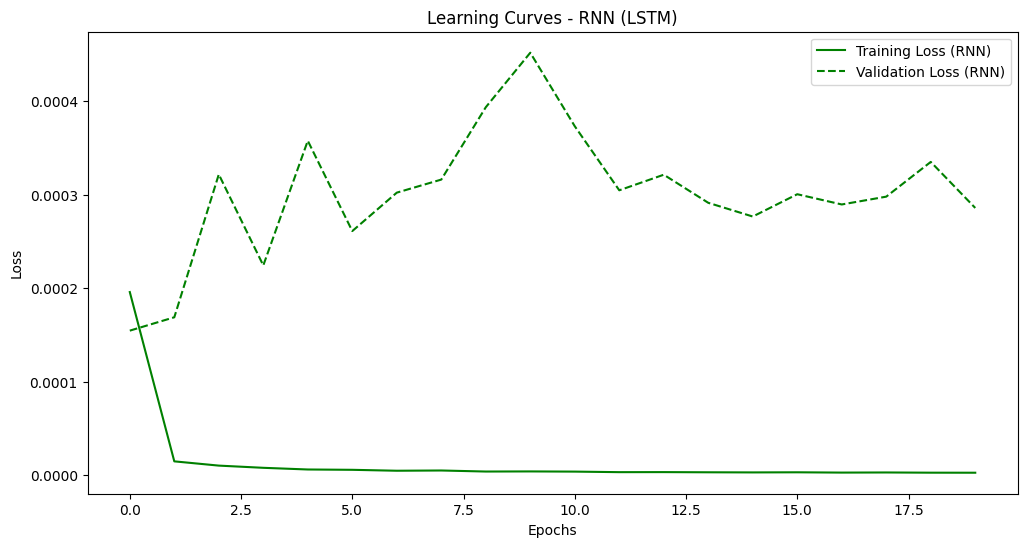

In [50]:
# Plot learning curves for the CNN model
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss (CNN)', color='r')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss (CNN)', color='r', linestyle='dashed')
plt.title('Learning Curves - 1D CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot learning curves for the RNN model
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['loss'], label='Training Loss (RNN)', color='g')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss (RNN)', color='g', linestyle='dashed')
plt.title('Learning Curves - RNN (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()